In [1]:
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt
tf.device('/gpu:0')

Using TensorFlow backend.


In [2]:
# Directorios de los datos de entrenamiento y validación
train_dir = 'C:/Users/Omar/OneDrive - UNIVERSIDAD DE INGENIERIA Y TECNOLOGIA/Escritorio/VCICLO/MACHINE LEARNING/train'
test_dir = 'C:/Users/Omar/OneDrive - UNIVERSIDAD DE INGENIERIA Y TECNOLOGIA/Escritorio/VCICLO/MACHINE LEARNING/test'

batch_size = 32

# Dimensiones de nuestras imágenes.
img_width, img_height = 48, 48

# Ajustar la forma de entrada dependiendo de la configuración de los canales
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [3]:
# Creación del modelo
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7))  # Cambia el número de neuronas aquí para que coincida con el número de actores/clases
model.add(Activation('softmax'))  # Cambia 'sigmoid' por 'softmax' para clasificación multiclase
# Resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 21, 21, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)        

In [4]:
# Compilación del modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [5]:
def count_files_in_subfolders(directory):
    """ Cuenta el número de archivos en cada subcarpeta de un directorio dado. """
    for subfolder in os.listdir(directory):
        subfolder_path = os.path.join(directory, subfolder)
        if os.path.isdir(subfolder_path):
            total_files = len([file for file in os.listdir(subfolder_path) 
                               if os.path.isfile(os.path.join(subfolder_path, file))])
            print(f"Total de archivos en '{subfolder}': {total_files}")

# Contar los archivos en las subcarpetas de cada directorio
print("Contando archivos en el directorio de entrenamiento:")
count_files_in_subfolders(train_dir)

print("\nContando archivos en el directorio de prueba:")
count_files_in_subfolders(test_dir)

Contando archivos en el directorio de entrenamiento:
Total de archivos en 'angry': 3993
Total de archivos en 'disgust': 436
Total de archivos en 'fear': 4103
Total de archivos en 'happy': 7164
Total de archivos en 'neutral': 4982
Total de archivos en 'sad': 4938
Total de archivos en 'surprise': 3205

Contando archivos en el directorio de prueba:
Total de archivos en 'angry': 960
Total de archivos en 'disgust': 111
Total de archivos en 'fear': 1018
Total de archivos en 'happy': 1825
Total de archivos en 'neutral': 1216
Total de archivos en 'sad': 1139
Total de archivos en 'surprise': 797


In [6]:
# Entrenamiento del modelo
history = model.fit(
    train_generator,
    epochs=100,  # Número de épocas
    validation_data=validation_generator)

Epoch 1/100
901/901 [==============================] - 36s 40ms/step - loss: 1.7824 - accuracy: 0.2660 - val_loss: 1.7451 - val_accuracy: 0.3603
Epoch 2/100
901/901 [==============================] - 32s 36ms/step - loss: 1.6333 - accuracy: 0.3544 - val_loss: 1.4789 - val_accuracy: 0.4233
Epoch 3/100
901/901 [==============================] - 35s 39ms/step - loss: 1.5242 - accuracy: 0.4072 - val_loss: 1.2672 - val_accuracy: 0.4561
Epoch 4/100
901/901 [==============================] - 36s 40ms/step - loss: 1.4608 - accuracy: 0.4333 - val_loss: 1.6901 - val_accuracy: 0.4866
Epoch 5/100
901/901 [==============================] - 33s 37ms/step - loss: 1.4201 - accuracy: 0.4486 - val_loss: 1.3059 - val_accuracy: 0.5050
Epoch 6/100
901/901 [==============================] - 33s 36ms/step - loss: 1.3906 - accuracy: 0.4657 - val_loss: 1.3165 - val_accuracy: 0.5190
Epoch 7/100
901/901 [==============================] - 33s 36ms/step - loss: 1.3644 - accuracy: 0.4749 - val_loss: 1.0672 - val_ac

In [8]:
model.save('modelo_completo_100.h5')  # Guarda en un archivo HDF5 'modelo_completo.h5'

In [9]:
# Abrir un archivo para escribir los resultados del entrenamiento
with open('historial_entrenamiento.txt', 'w') as f:
    # Escribir los encabezados de las columnas
    f.write('Training Loss,Training Accuracy,Validation Loss,Validation Accuracy\n')

    # Iterar por cada época y escribir las métricas
    for epoch in range(len(history.history['loss'])):  # Asumiendo que quieres todas las épocas
        train_loss = history.history['loss'][epoch]
        train_acc = history.history['accuracy'][epoch]
        val_loss = history.history['val_loss'][epoch]
        val_acc = history.history['val_accuracy'][epoch]

        # Escribir las métricas de cada época en el formato deseado
        f.write(f"Epoch {epoch+1}:\n")
        f.write(f"Training Loss: [{train_loss}]\n")
        f.write(f"Training Accuracy: [{train_acc}]\n")
        f.write(f"Validation Loss: [{val_loss}]\n")
        f.write(f"Validation Accuracy: [{val_acc}]\n\n")



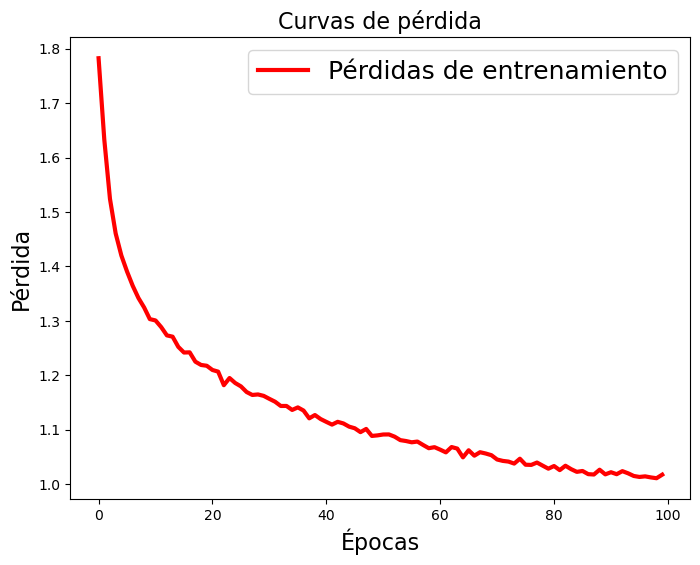

In [13]:
# Graficar las curvas de pérdida y precisión
plt.figure(figsize=[8, 6])
plt.plot(history.history['loss'], 'r', linewidth=3.0)
#plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Pérdidas de entrenamiento', 'Pérdidas de validación'], fontsize=18)
plt.xlabel('Épocas', fontsize=16)
plt.ylabel('Pérdida', fontsize=16)
plt.title('Curvas de pérdida', fontsize=16)
plt.show()

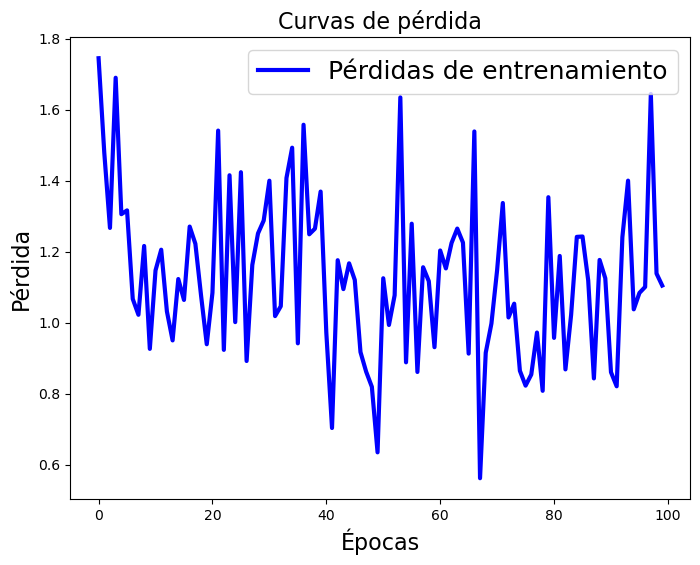

In [20]:
# Graficar las curvas de pérdida y precisión
plt.figure(figsize=[8, 6])
#plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Pérdidas de entrenamiento', 'Pérdidas de validación'], fontsize=18)
plt.xlabel('Épocas', fontsize=16)
plt.ylabel('Pérdida', fontsize=16)
plt.title('Curvas de pérdida', fontsize=16)
plt.show()

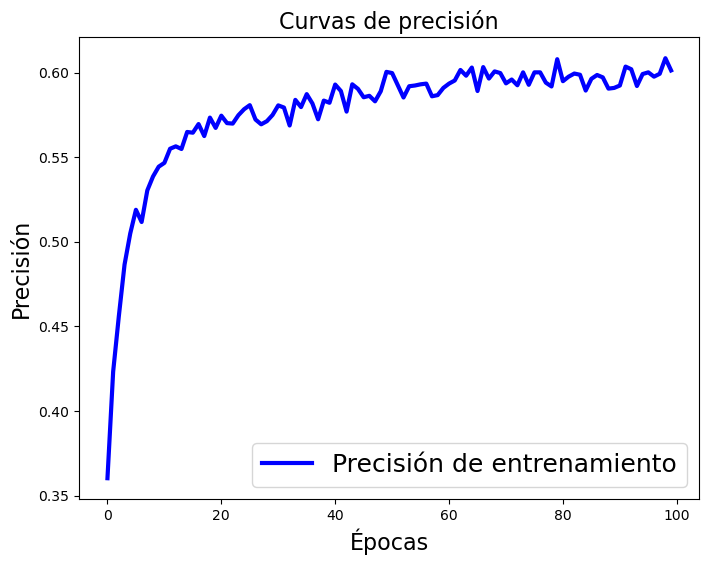

In [16]:
plt.figure(figsize=[8, 6])
#plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
plt.plot(history.history['val_accuracy'], 'b', linewidth=3.0)
plt.legend(['Precisión de entrenamiento', 'Precisión de validación'], fontsize=18)
plt.xlabel('Épocas', fontsize=16)
plt.ylabel('Precisión', fontsize=16)
plt.title('Curvas de precisión', fontsize=16)
plt.show()

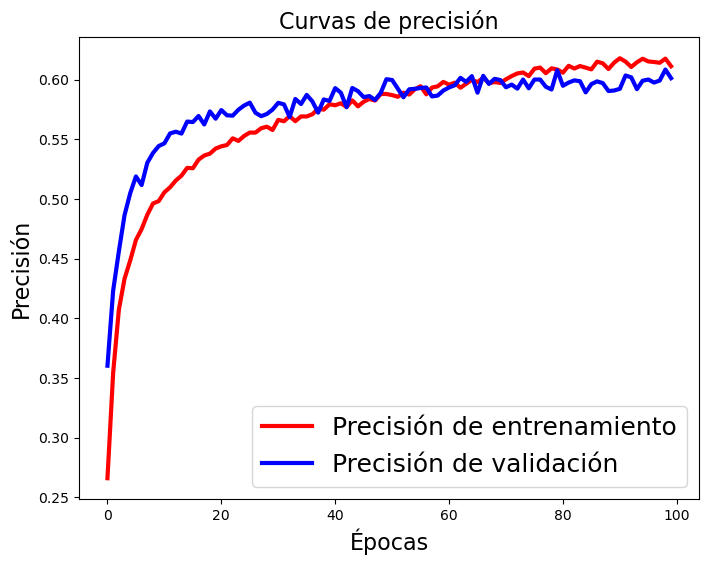

In [18]:
plt.figure(figsize=[8, 6])
plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
plt.plot(history.history['val_accuracy'], 'b', linewidth=3.0)
plt.legend(['Precisión de entrenamiento', 'Precisión de validación'], fontsize=18)
plt.xlabel('Épocas', fontsize=16)
plt.ylabel('Precisión', fontsize=16)
plt.title('Curvas de precisión', fontsize=16)
plt.show()